# Least Squares

With given 3 signals, blood pressure heart rate and respiration rate, from second 0 to n, lets assume the following equations:

\begin{gather}
 \begin{bmatrix} HR_{1} \\ \vdots \\ HR_{n} \end{bmatrix}
 =
 \begin{bmatrix} 
    HR_{0} & BP_{0} & RR_{0} \\
    \vdots & \vdots & \vdots \\
    HR_{n-1} & BP_{n-1} & RR_{n-1} 
    \end{bmatrix}
  \begin{bmatrix}
   A_{1}   \\
   B_{1}  \\
   C_{1} 
   \end{bmatrix}
\end{gather}

\begin{gather}
 \begin{bmatrix} BP_{1} \\ \vdots \\ BP_{n} \end{bmatrix}
 =
 \begin{bmatrix} 
    HR_{0} & BP_{0} & RR_{0} \\
    \vdots & \vdots & \vdots \\
    HR_{n-1} & BP_{n-1} & RR_{n-1} 
    \end{bmatrix}
  \begin{bmatrix}
   A_{2}   \\
   B_{2}  \\
   C_{2} 
   \end{bmatrix}
\end{gather}

\begin{gather}
 \begin{bmatrix} RR_{1} \\ \vdots \\ RR_{n} \end{bmatrix}
 =
 \begin{bmatrix} 
    HR_{0} & BP_{0} & RR_{0} \\
    \vdots & \vdots & \vdots \\
    HR_{n-1} & BP_{n-1} & RR_{n-1} 
    \end{bmatrix}
  \begin{bmatrix}
   A_{3}   \\
   B_{3}  \\
   C_{3} 
   \end{bmatrix}
\end{gather}

Using the Least Squares method, we will regress the following vectors:
\begin{gather}\begin{bmatrix}A_{1}\\B_{1}\\C_{1}\end{bmatrix},\begin{bmatrix}A_{2}\\B_{2}\\C_{2}\end{bmatrix},\begin{bmatrix}A_{3}\\B_{3}\\C_{3}\end{bmatrix}\end{gather}

For example:
\begin{gather}\overline{\begin{bmatrix}A_{1}\\B_{1}\\C_{1}\end{bmatrix}}= \left(\begin{bmatrix}HR_{0}&BP_{0}&RR_{0}\\ \vdots&\vdots&\vdots\\ HR_{n-1} & BP_{n-1} & RR_{n-1}\end{bmatrix}^T\begin{bmatrix}HR_{0}&BP_{0}&RR_{0}\\ \vdots&\vdots&\vdots\\ HR_{n-1} & BP_{n-1} & RR_{n-1}\end{bmatrix}\right)^{-1}\begin{bmatrix}HR_{0}&BP_{0}&RR_{0}\\ \vdots&\vdots&\vdots\\ HR_{n-1} & BP_{n-1} & RR_{n-1}\end{bmatrix}^T\begin{bmatrix}HR_{1}\\ \vdots\\ HR_{n}\end{bmatrix}\end{gather}

The following cell include calculating the regressed matrix from the 3 signals:







In [56]:
%run blood-pressure.ipynb
%run heart-rate.ipynb
%run respiration.ipynb

time, bp_train = bp(200,400,0,0)
time, hr_train = hr(200,400,0,0)
time, rr_train = rr(200,400,0,0)

# x is the 3 signals data from 0 to n-1
x = np.column_stack((hr_train, bp_train, rr_train))
x = np.delete(x, -1, axis=0)

# y_i is the data from 1 to n for the i signal
y_bp = np.delete(bp_train, 0)
y_rr = np.delete(rr_train, 0)
y_hr = np.delete(hr_train, 0)

# caulating the tranformation matrix using least squares 
bp_transformation = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_bp))
rr_transformation = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_rr))
hr_transformation = np.dot(np.linalg.inv(np.dot(x.transpose(),x)),np.dot(x.transpose(),y_hr))

T = np.row_stack((hr_transformation, bp_transformation, rr_transformation))

print("The regressed matrix is:")
print()
print("[A1, B1, C1] = ", hr_transformation)
print("[A2, B2, C2] = ", bp_transformation)
print("[A3, B3, C3] = ", rr_transformation)


The regressed matrix is:

[A1, B1, C1] =  [0.78615036 0.36218234 0.03144048]
[A2, B2, C2] =  [0.04537546 0.91243967 0.00696631]
[A3, B3, C3] =  [0.01057521 0.31154389 0.5603468 ]


Lets define:
\begin{gather}
T =
 \begin{bmatrix} 
    A_{1} & B_{1} & C_{1} \\
    A_{2} & B_{2} & C_{2} \\
    A_{3} & B_{3} & C_{3} 
    \end{bmatrix},
   X_{n} =
 \begin{bmatrix} 
    HR_{n}\\
    BP_{n}\\
    RR_{n} 
    \end{bmatrix}
\end{gather}

# test matrix #1
Lets test the regressed matrix by caculating the following:
\begin{gather}
\overline{X}_{n+1} = \overline{T} X{n}
\end{gather}



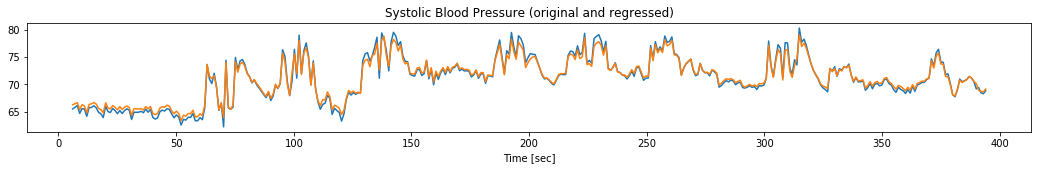

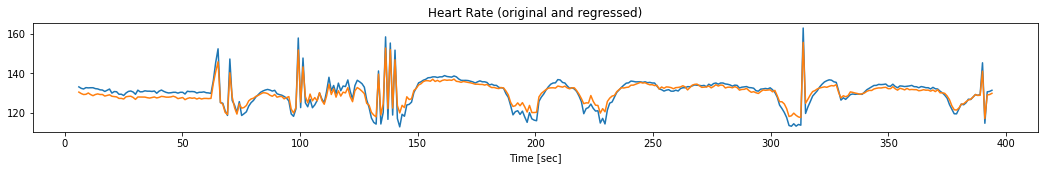

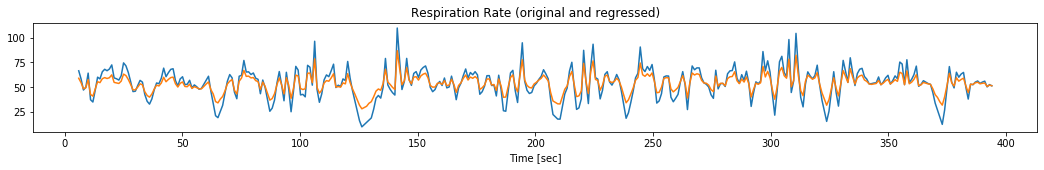

In [57]:
time, bp_test = bp(0,400,0,0)
time, hr_test = hr(0,400,0,0)
time, rr_test = rr(0,400,0,0)

hr_reg = []
bp_reg = []
rr_reg = []

for i in range(len(bp_test)):
    x = np.array([hr_test[i], bp_test[i], rr_test[i]])
    x = np.dot(T,x.transpose())
    hr_reg.append(x[0])
    bp_reg.append(x[1])
    rr_reg.append(x[2])

# plot the three regressed signals
plt.figure(figsize=(18, 2))
plt.plot(time, bp_test)
plt.plot(time, bp_reg)
plt.title('Systolic Blood Pressure (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(time, hr_test)
plt.plot(time, hr_reg)
plt.title('Heart Rate (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(time, rr_test)
plt.plot(time, rr_reg)
plt.title('Respiration Rate (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()


# test matrix #2
Another way to test the matrix is by building one signal from the other two as follows:
\begin{gather}
\overline{HR}_{i} = \overline{HR}_{i-1}∙\overline{A}_{1} + BP_{i-1}∙\overline{B}_{1} + RR_{i-1}∙\overline{C}_{1}
\end{gather}
\begin{gather}
\overline{BP}_{i} = HR_{i-1}∙\overline{A}_{1} + \overline{BP}_{i-1}∙\overline{B}_{1} + RR_{i-1}∙\overline{C}_{1}
\end{gather}
\begin{gather}
\overline{RR}_{i} = HR_{i-1}∙\overline{A}_{1} + BP_{i-1}∙\overline{B}_{1} + \overline{RR}_{i-1}∙\overline{C}_{1}
\end{gather}

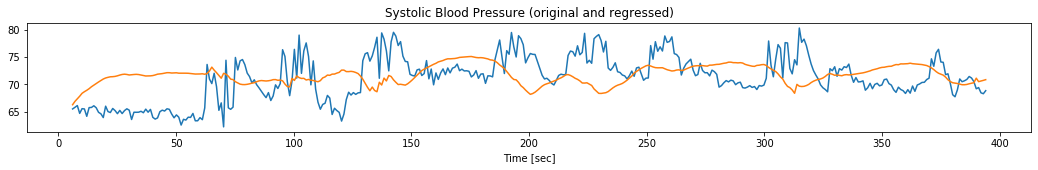

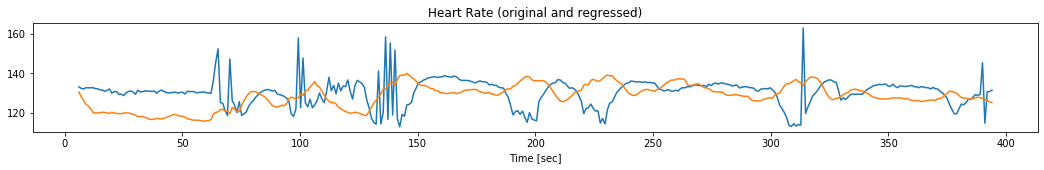

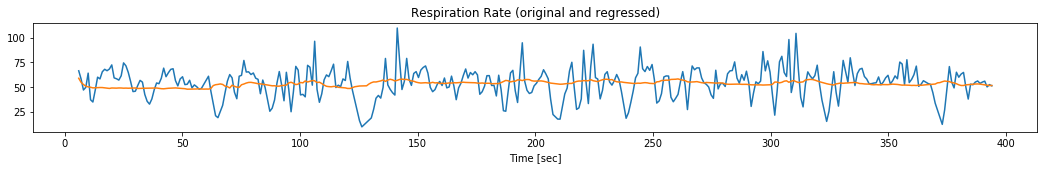

In [58]:
# caluclating each signal using the other two signals
bp_reg = []
bp_reg.append(bp_test[0])
for (hr_sample, rr_sample, bp_sample) in zip(hr_test, rr_test, bp_reg):
    bp_reg.append(bp_sample*bp_transformation[1] + hr_sample*bp_transformation[0] + rr_sample*bp_transformation[2])
    
hr_reg = []
hr_reg.append(hr_test[0])
for (hr_sample, rr_sample, bp_sample) in zip(hr_reg, rr_test, bp_test):
    hr_reg.append(bp_sample*hr_transformation[1] + hr_sample*hr_transformation[0] + rr_sample*hr_transformation[2])

rr_reg = []
rr_reg.append(rr_test[0])
for (hr_sample, rr_sample, bp_sample) in zip(hr_test, rr_reg, bp_test):
    rr_reg.append(bp_sample*rr_transformation[1] + hr_sample*rr_transformation[0] + rr_sample*rr_transformation[2])

# plot the three regressed signals
plt.figure(figsize=(18, 2))
plt.plot(time, bp_test)
plt.plot(time, bp_reg[1:])
plt.title('Systolic Blood Pressure (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(time, hr_test)
plt.plot(time, hr_reg[1:])
plt.title('Heart Rate (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

plt.figure(figsize=(18, 2))
plt.plot(time, rr_test)
plt.plot(time, rr_reg[1:])
plt.title('Respiration Rate (original and regressed)')
plt.xlabel('Time [sec]')
plt.show()

